In [38]:
import pandas as pd

# Load the dataset
file_path = 'C:/Shiva Files/Shiva SSD/Shiva/MSBA Cohort/Semester 2/Predictive Analytics/Conagra Project/Data_merge/Meat_substitue/Editings_merged/Gardein.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

print(data.columns)

Index(['Geography', 'Time', 'Date', 'Month', 'Year', 'Product', 'UPC 13 digit',
       'Maufacturer Name', 'Brand Franchise Name', 'Brand Name', 'Unit Sales',
       'Unit Sales No Merch', 'Unit Sales Any Merch',
       'Unit Sales Price Reductions Only', 'Unit Sales Feature Only',
       'Unit Sales Display Only', 'Unit Sales Special Pack Only',
       'Unit Sales Feature and Display', 'Volume Sales',
       'Volume Sales No Merch', 'Volume Sales Any Merch',
       'Volume Sales Price Reductions Only', 'Volume Sales Feature Only',
       'Volume Sales Display Only', 'Volume Sales Special Pack Only',
       'Volume Sales Feature and Display', 'Dollar Sales',
       'Dollar Sales No Merch', 'Dollar Sales Any Merch',
       'Dollar Sales Price Reductions Only', 'Dollar Sales Feature Only',
       'Dollar Sales Display Only', 'Dollar Sales Special Pack Only',
       'Dollar Sales Feature and Display', 'Price per Unit',
       'Price per Unit No Merch', 'Price per Unit Any Merch',
       '

## Time series Analysis with Actual Sales

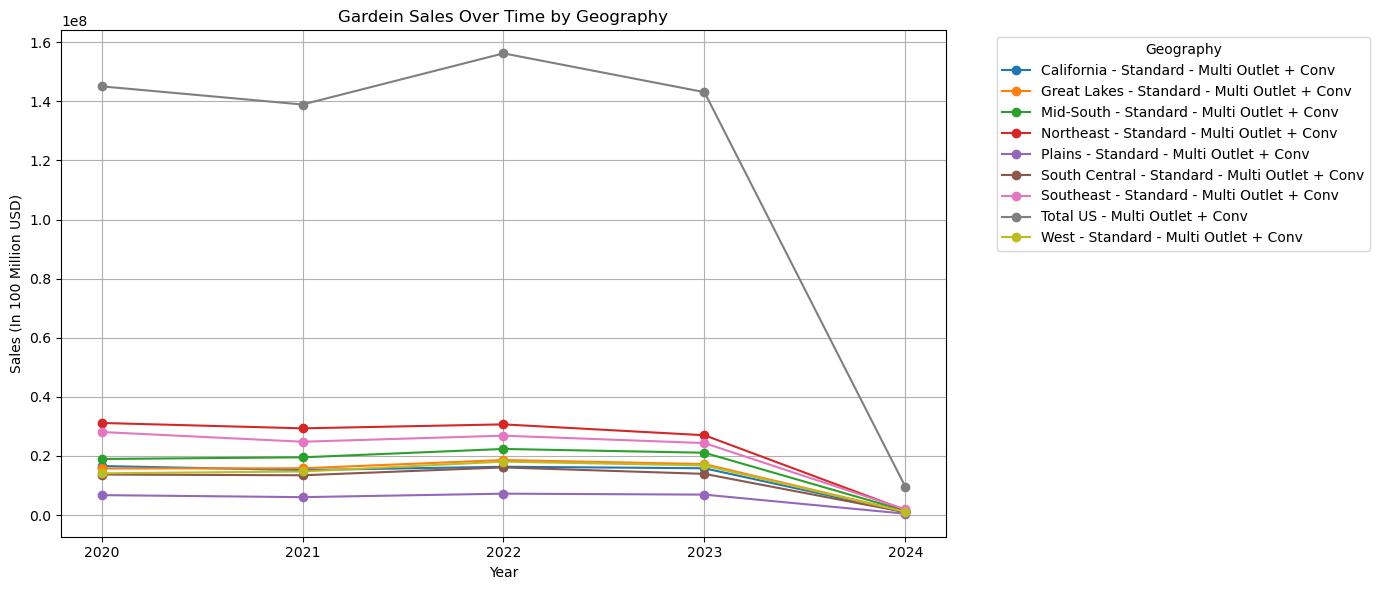

In [4]:
import matplotlib.pyplot as plt

# Group by Year and Geography and sum the Dollar Sales
grouped_df = data.groupby(['Year', 'Geography'])['Dollar Sales'].sum().reset_index()

# Pivot the data for easier plotting
pivot_df = grouped_df.pivot(index='Year', columns='Geography', values='Dollar Sales')

# Convert index to integers
pivot_df.index = pivot_df.index.astype(int)

# Get the unique years from the pivot_df index
years = pivot_df.index.unique()

# Plotting
pivot_df.plot(kind='line', marker='o', figsize=(14, 6))
plt.title('Gardein Sales Over Time by Geography')
plt.xlabel('Year')
plt.ylabel('Sales (In 100 Million USD)')

# Set x-axis ticks to be integer years
plt.xticks(years, [str(int(year)) for year in years])

plt.grid(True)
plt.legend(title='Geography', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Time series Analysis with Actual Sales vs Base Sales

C:\Users\koppu\AppData\Local\Temp\ipykernel_28892\526104083.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', len(pivot_df.columns.levels[1]))


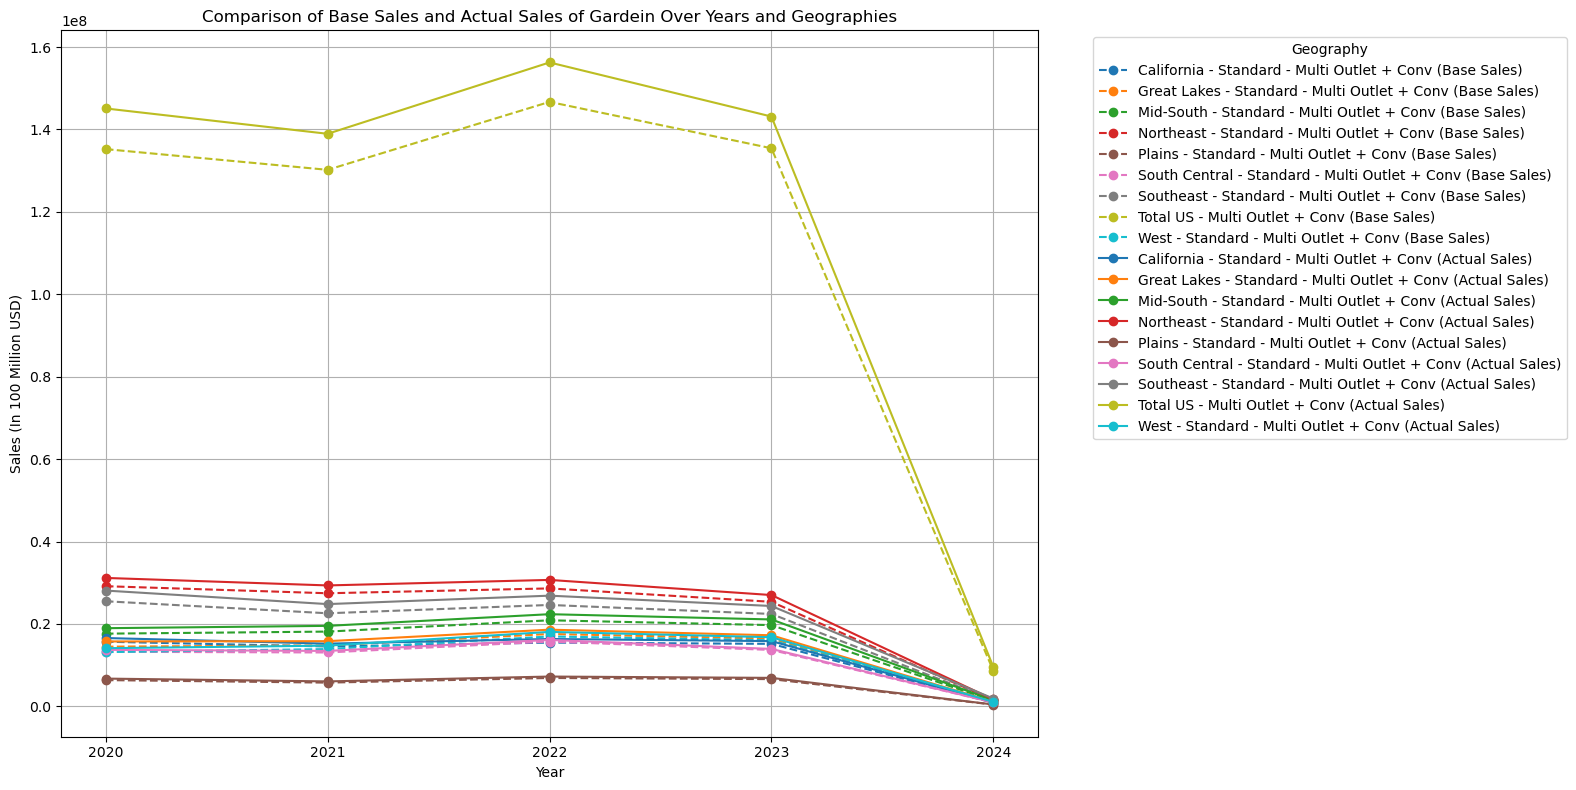

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by Year and Geography and sum the Base Dollar Sales and Dollar Sales
sales_year_geo = data.groupby(['Year', 'Geography'])[['Base Dollar Sales', 'Dollar Sales']].sum().reset_index()

# Pivot the data for easier plotting
pivot_df = sales_year_geo.pivot(index='Year', columns='Geography', values=['Base Dollar Sales', 'Dollar Sales'])

# Define a color palette with unique colors for each geography
color_palette = plt.cm.get_cmap('tab10', len(pivot_df.columns.levels[1]))

# Plotting
fig, ax = plt.subplots(figsize=(16, 8))

# Plot Base Dollar Sales for each geography
for col in pivot_df['Base Dollar Sales']:
    pivot_df['Base Dollar Sales'][col].plot(kind='line', ax=ax, marker='o', color=color_palette.colors[pivot_df.columns.levels[1].get_loc(col)], linestyle='--', label=f'{col} (Base Sales)')

# Plot Dollar Sales for each geography
for col in pivot_df['Dollar Sales']:
    pivot_df['Dollar Sales'][col].plot(kind='line', ax=ax, marker='o', color=color_palette.colors[pivot_df.columns.levels[1].get_loc(col)], label=f'{col} (Actual Sales)')

    
# Get the unique years from the pivot_df index
years = pivot_df.index.unique()
    
# Add labels and title
plt.xlabel('Year')
plt.ylabel('Sales (In 100 Million USD)')
plt.title('Comparison of Base Sales and Actual Sales of Gardein Over Years and Geographies')

# Customize legend
ax.legend(title='Geography', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set x-axis ticks to be integer years
plt.xticks(years, [str(int(year)) for year in years])

plt.grid(True)
plt.tight_layout()
plt.show()


## Top Products Sold in USD

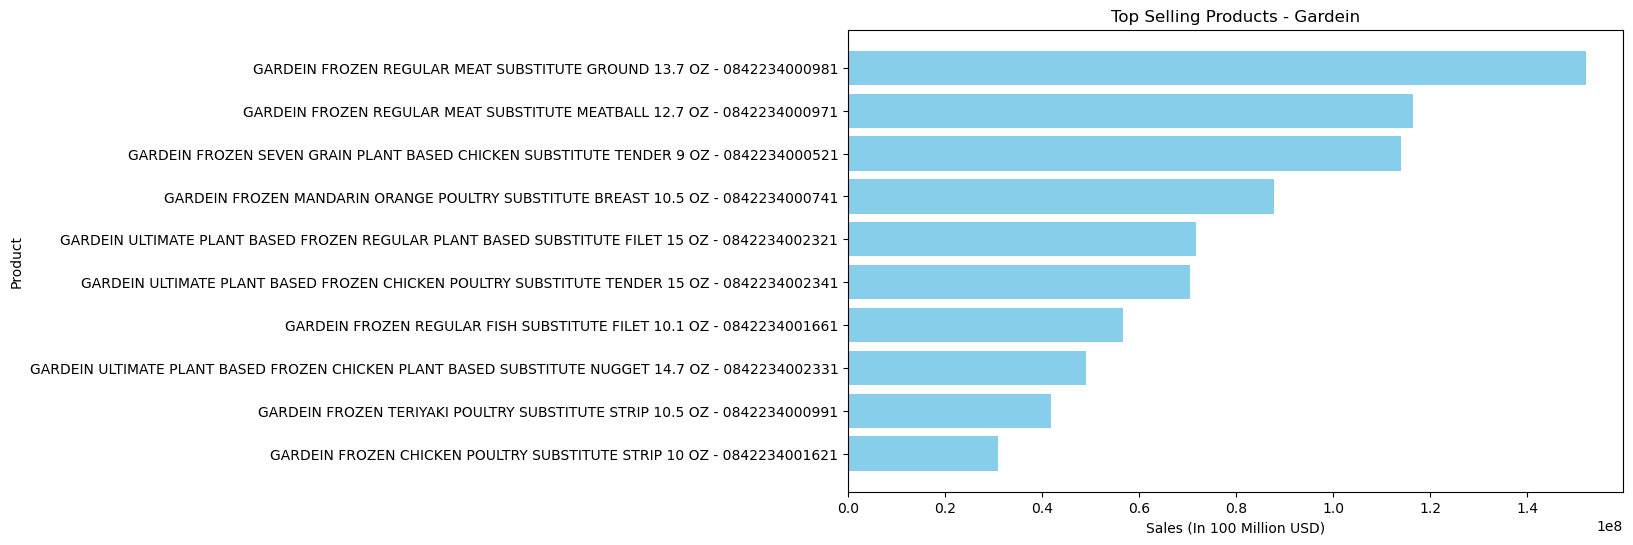

In [12]:
# Group by Product and sum the Dollar Sales
product_sales = data.groupby('Product')['Dollar Sales'].sum().reset_index()

# Sort by Dollar Sales in descending order
product_sales = product_sales.sort_values(by='Dollar Sales', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(product_sales['Product'][:10], product_sales['Dollar Sales'][:10], color='skyblue')
plt.xlabel('Sales (In 100 Million USD)')
plt.ylabel('Product')
plt.title('Top Selling Products - Gardein')
plt.gca().invert_yaxis()  # Invert y-axis to display the product with the highest sales on top
plt.show()

## Top Products Types Sold in USD

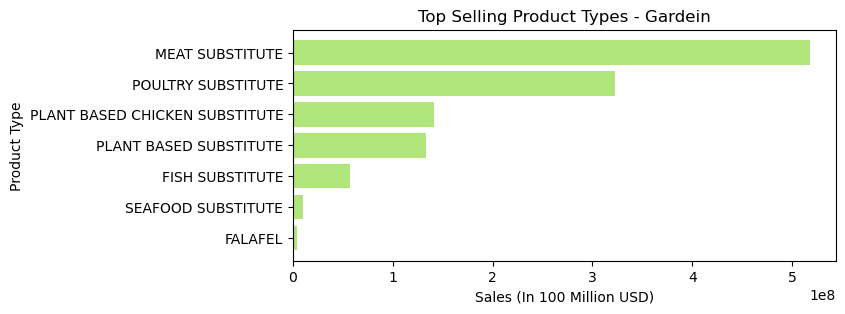

In [20]:
import matplotlib.pyplot as plt
# Group by Product and sum the Dollar Sales
product_type_sales = data.groupby('Product Type')['Dollar Sales'].sum().reset_index()

# Sort by Dollar Sales in descending order
product_type_sales = product_type_sales.sort_values(by='Dollar Sales', ascending=False)

# Plotting
plt.figure(figsize=(7, 3))
plt.barh(product_type_sales['Product Type'][:10], product_type_sales['Dollar Sales'][:10], color='#B0E57C')
plt.xlabel('Sales (In 100 Million USD)')
plt.ylabel('Product Type')
plt.title('Top Selling Product Types - Gardein')
plt.gca().invert_yaxis()  # Invert y-axis to display the product with the highest sales on top
plt.show()

## Top Falvors/Scent Sold in USD

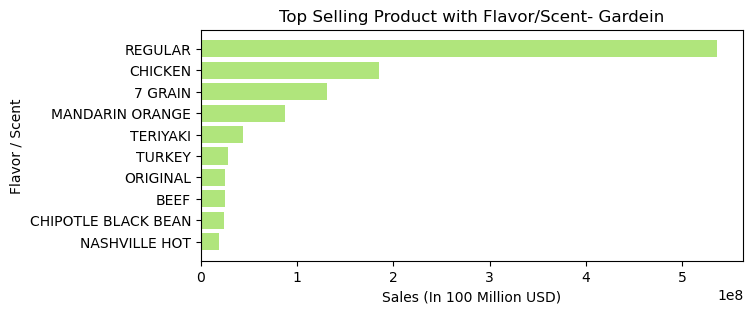

In [21]:
# Group by Product and sum the Dollar Sales
flavor_sales = data.groupby('Flavor / Scent')['Dollar Sales'].sum().reset_index()

# Sort by Dollar Sales in descending order
flavor_sales = flavor_sales.sort_values(by='Dollar Sales', ascending=False)

# Plotting
plt.figure(figsize=(7, 3))
plt.barh(flavor_sales['Flavor / Scent'][:10], flavor_sales['Dollar Sales'][:10], color='#B0E57C')
plt.xlabel('Sales (In 100 Million USD)')
plt.ylabel('Flavor / Scent')
plt.title('Top Selling Product with Flavor/Scent- Gardein')
plt.gca().invert_yaxis()  # Invert y-axis to display the product with the highest sales on top
plt.show()

## Top Food Forms in USD

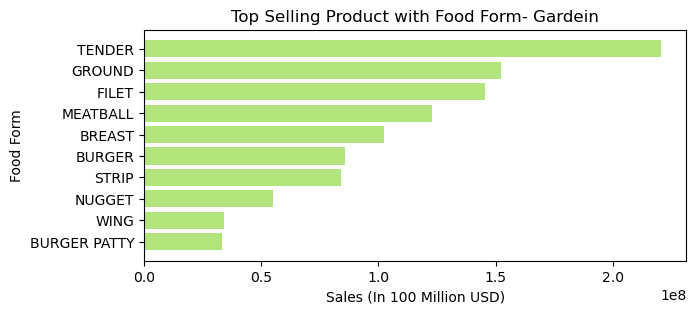

In [22]:
# Group by Product and sum the Dollar Sales
form_sales = data.groupby('Form')['Dollar Sales'].sum().reset_index()

# Sort by Dollar Sales in descending order
form_sales = form_sales.sort_values(by='Dollar Sales', ascending=False)

# Plotting
plt.figure(figsize=(7, 3))
plt.barh(form_sales['Form'][:10], form_sales['Dollar Sales'][:10], color='#B0E57C')
plt.xlabel('Sales (In 100 Million USD)')
plt.ylabel('Food Form')
plt.title('Top Selling Product with Food Form- Gardein')
plt.gca().invert_yaxis()  # Invert y-axis to display the product with the highest sales on top
plt.show()

## Top Products Sold geography-wise

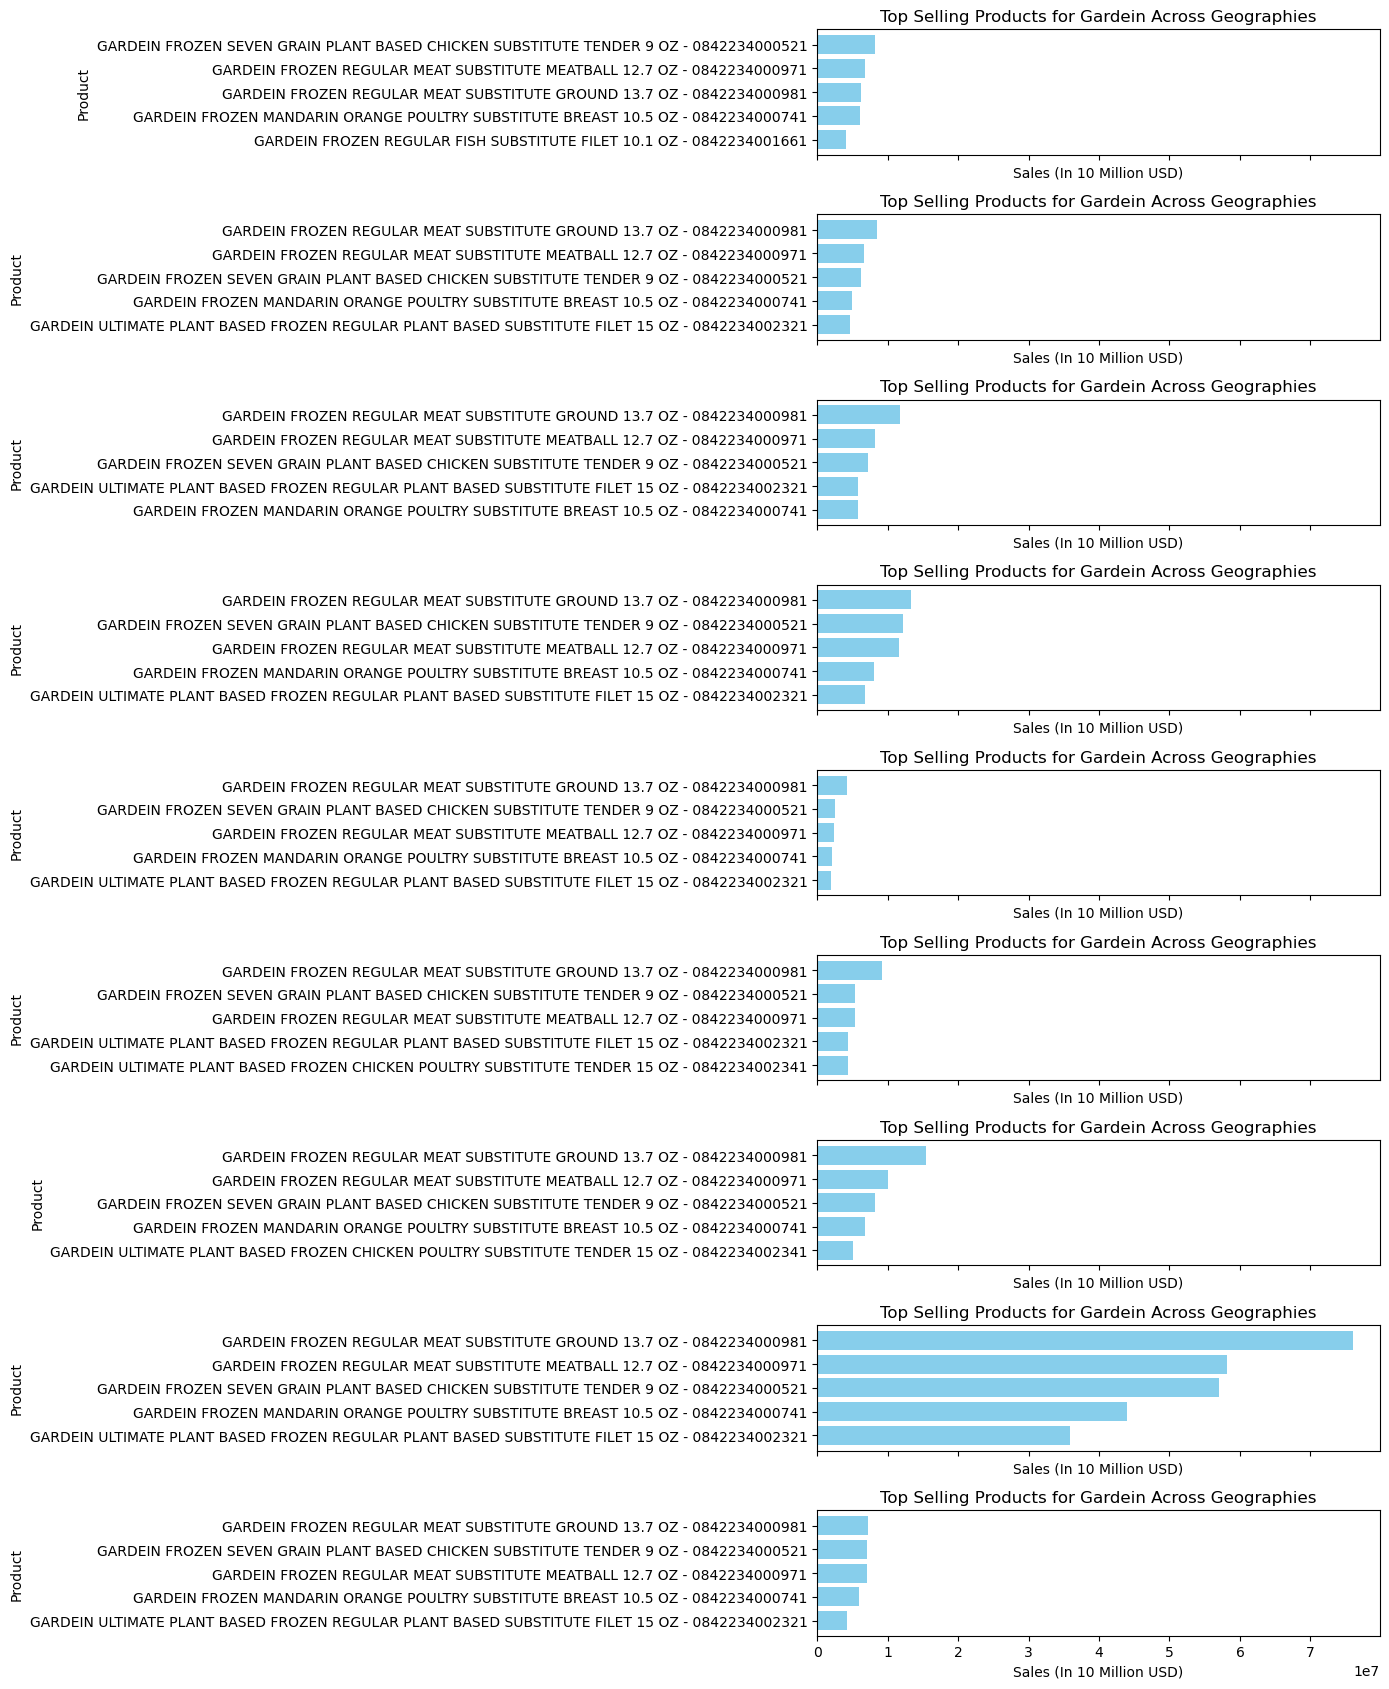

In [39]:
# Group by Product, Geography, and sum the Dollar Sales
product_sales_geography = data.groupby(['Product', 'Geography'])['Dollar Sales'].sum().reset_index()

# Find top products sold in each geography
top_products_geography = product_sales_geography.groupby('Geography').apply(lambda x: x.nlargest(5, 'Dollar Sales')).reset_index(drop=True)

# Plotting
fig, axes = plt.subplots(nrows=len(top_products_geography['Geography'].unique()), figsize=(14, 17), sharex=True)
plt.subplots_adjust(hspace=0.5)

for ax, (geography, data) in zip(axes, top_products_geography.groupby('Geography')):
    ax.barh(data['Product'], data['Dollar Sales'], color='skyblue')
    ax.set_title("Top Selling Products for Gardein Across Geographies")
    ax.set_xlabel('Sales (In 10 Million USD)')
    ax.set_ylabel('Product')
    ax.invert_yaxis()  # Invert y-axis to display the product with the highest sales on top

plt.tight_layout()
plt.show()


In [25]:
import pandas as pd

# Load the dataset
file_path = 'C:/Shiva Files/Shiva SSD/Shiva/MSBA Cohort/Semester 2/Predictive Analytics/Conagra Project/Data_merge/Meat_substitue/Editings_merged/Gardein.xlsx'
data3 = pd.read_excel(file_path)


print(data.columns)

Index(['Product', 'Geography', 'Dollar Sales'], dtype='object')


## ACV Weighted Distribution Across Geographies


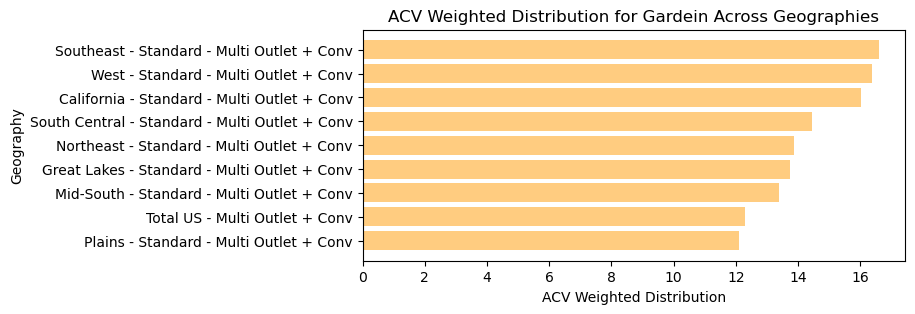

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by Geography and calculate the mean ACV Weighted Distribution for each geography
acv_distribution = data3.groupby('Geography')['ACV Weighted Distribution'].mean().reset_index()

# Sort the dataframe by ACV Weighted Distribution in descending order
acv_distribution = acv_distribution.sort_values(by='ACV Weighted Distribution', ascending=False)

# Plotting
plt.figure(figsize=(7, 3))
plt.barh(acv_distribution['Geography'], acv_distribution['ACV Weighted Distribution'], color='#FFCC80')
plt.xlabel('ACV Weighted Distribution')
plt.ylabel('Geography')
plt.title('ACV Weighted Distribution for Gardein Across Geographies')
plt.gca().invert_yaxis()  # Invert y-axis to display the geography with the highest ACV on top
plt.show()